# Análisis exploratorio de datos con python

In [1]:
#Importación de nuestras librerías de trabajo

import os # Gestión de directorio
import pandas as pd # Manipulación de data frames
import numpy as np # Manipulación de Arrays
import matplotlib.pyplot as plt # Componente gráfico
import seaborn as sns # Componente gráfico

In [2]:
# Establecimiento de directorio de trabajo

os.getcwd() # Validamos que sea correcto
os.chdir('C:\\Users\\Julian\\Desktop\\Cursos\\Cursos Github\\Metodos_estadisticos') #Modificamos de ser necesario
os.listdir() # Revisamos los ficheros existentes

['.git', 'Data sets', 'Project GEIH 23', 'README.md']

In [3]:
gen_23 = pd.read_csv('Data sets\\gen_23.csv')

In [4]:
gen_23.head()

,Unnamed: 0,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,MES,CLASE,FEX_C18,DPTO,P3271,P6040,P2057,P6080,P6070,P6160,P3042,P3042S1,P3038
0,1,7396102,1,1,1,4,1,683.772616,68,2,81,1,6,5.0,1.0,3.0,2.0,1.0
1,2,7396102,1,2,1,4,1,683.772616,68,2,48,1,6,6.0,1.0,5.0,2.0,1.0
2,3,7396103,1,1,1,4,1,1181.370048,68,1,36,1,6,2.0,1.0,3.0,2.0,2.0
3,4,7396103,1,2,1,4,1,1181.370048,68,2,39,2,6,2.0,1.0,5.0,2.0,1.0
4,5,7396103,1,3,1,4,1,1181.370048,68,1,11,2,6,6.0,1.0,4.0,2.0,NaN


In [5]:
gen_23.shape #dimensionalidad de mi df

(860802, 18)

## Limpieza de datos

Generalmente los conjuntos de datos contienen mucho suciedad que suele dificultan su adecuado tratamiento y pueden llevarnos a conclusiones erradas. Es importante tratar esta situación a través de un proceso que llamamos limpieza o depuración de los datos. Entre estas situaciones comunes encontramos:

1. Datos faltantes o perdidos 
1. Columnas irrelevantes (que no responden al problema que queremos resolver)
1. Valores atípicos (*outliers*) o extremos (*extremes*)que requieren un tratamiento particular.   
1. Errores tipográficos 
1. Registros (filas) repetidos [redundancia de datos]

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

In [6]:
gen_23.info() #Validamos datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860802 entries, 0 to 860801
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   860802 non-null  int64  
 1   DIRECTORIO   860802 non-null  int64  
 2   SECUENCIA_P  860802 non-null  int64  
 3   ORDEN        860802 non-null  int64  
 4   HOGAR        860802 non-null  int64  
 5   MES          860802 non-null  int64  
 6   CLASE        860802 non-null  int64  
 7   FEX_C18      860802 non-null  float64
 8   DPTO         860802 non-null  int64  
 9   P3271        860802 non-null  int64  
 10  P6040        860802 non-null  int64  
 11  P2057        860802 non-null  int64  
 12  P6080        860802 non-null  int64  
 13  P6070        743034 non-null  float64
 14  P6160        831109 non-null  float64
 15  P3042        831109 non-null  float64
 16  P3042S1      831109 non-null  float64
 17  P3038        631485 non-null  float64
dtypes: float64(6), int64(12)

In [7]:
gen_23.columns # Columnas irrelevantes

Index(['Unnamed: 0', 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR', 'MES',
       'CLASE', 'FEX_C18', 'DPTO', 'P3271', 'P6040', 'P2057', 'P6080', 'P6070',
       'P6160', 'P3042', 'P3042S1', 'P3038'],
      dtype='object')

In [8]:
#Eliminaré atracción, no me representa mayor interés para nuestra investigación

gen_23.drop(['Unnamed: 0', 'P3038'], axis=1, inplace=True)

In [9]:
# Creamos una primary key

gen_23['primary_key'] = gen_23['DIRECTORIO'].astype(str) + '-' + gen_23['SECUENCIA_P'].astype(str) + '-' + gen_23['ORDEN'].astype(str) + '-' + gen_23['HOGAR'].astype(str)

In [10]:
gen_23 = gen_23[['primary_key', 'MES', 'CLASE','FEX_C18', 'DPTO', 'P3271', 'P6040', 'P2057', 'P6080', 'P6070', 'P6160','P3042', 'P3042S1']]

In [11]:
#Cambiamos los nombres de las variables

gen_23.columns = ['primary_key', 'MES', 'CLASE','FEX_C18', 'DPTO','SEXO','EDAD','CAMPESINO','CULTURA','EST_CIVIL','LEE','NIVEL_EDUC','EDUC']
gen_23.sample(3)

,primary_key,MES,CLASE,FEX_C18,DPTO,SEXO,EDAD,CAMPESINO,CULTURA,EST_CIVIL,LEE,NIVEL_EDUC,EDUC
447494,7458814-1-2-1,6,1,92.714114,95,2,50,2,6,2.0,1.0,3.0,3.0
489630,7475401-1-2-1,6,1,355.363900,73,2,24,2,6,2.0,1.0,5.0,2.0
264135,7329170-1-2-1,1,1,2168.846722,23,2,60,1,5,2.0,1.0,4.0,1.0


In [12]:
# Categorizamos variables de interés

gen_23['SEXO'] = gen_23['SEXO'].replace({1: 'Hombre',2: 'Mujer'}) 

In [13]:
# Crear diccionario de departamentos
diccionario_dpto = {
    5: 'Antioquia',
    8: 'Atlántico',
    11: 'Bogotá',
    13: 'Bolívar',
    15: 'Boyacá',
    17: 'Caldas',
    18: 'Caquetá',
    19: 'Cauca',
    20: 'Cesar',
    23: 'Córdoba',
    25: 'Cundinamarca',
    27: 'Chocó',
    41: 'Huila',
    44: 'La Guajira',
    47: 'Magdalena',
    50: 'Meta',
    52: 'Nariño',
    54: 'Norte de Santander',
    63: 'Quindio',
    66: 'Risaralda',
    68: 'Santander',
    70: 'Sucre',
    73: 'Tolima',
    76: 'Valle del Cauca'
}


In [14]:
gen_23['DPTO'] = gen_23['DPTO'].replace(diccionario_dpto)

In [15]:
diccionario_est_civ = {
    1: 'Pareja < 2',
    2: 'Pareja >= 2',
    3: 'Casado',
    4: 'Separado',
    5: 'Viudo',
    6: 'Soltero'
}


In [16]:
gen_23['EST_CIVIL'] = gen_23['EST_CIVIL'].replace(diccionario_est_civ)

In [17]:
diccionario_niv_educ = {
    1: 'Ninguno',
    2: 'Preescolar',
    3: 'Básica primaria',
    4: 'Básica secundaria',
    5: 'Media',
    6: 'Media técnica',
    7: 'Normalista',
    8: 'Técnica profesional',
    9: 'Tecnológica',
    10: 'Universitaria',
    11: 'Especialización',
    12: 'Maestría',
    13: 'Doctorado',
    99: 'No informa'
}

In [18]:
# Para nivel educativo, mantendremos la variable codificada y crearemos una categorizada

gen_23['NIVEL_EDUC_CAT'] = gen_23.NIVEL_EDUC.replace(diccionario_niv_educ)

In [19]:
diccionario_meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

In [20]:
gen_23['MES'] = gen_23['MES'].replace(diccionario_meses)

In [21]:
gen_23.sample(2)

,primary_key,MES,CLASE,FEX_C18,DPTO,SEXO,EDAD,CAMPESINO,CULTURA,EST_CIVIL,LEE,NIVEL_EDUC,EDUC,NIVEL_EDUC_CAT
765872,7585971-1-1-1,octubre,1,179.561329,Nariño,Mujer,32,2,6,Casado,1.0,5.0,2.0,Media
71728,7424757-1-1-1,abril,2,451.534881,Meta,Hombre,60,1,6,Soltero,1.0,3.0,5.0,Básica primaria


In [22]:
# Validemos datos vacios

gen_23.isna().sum()

primary_key            0
MES                    0
CLASE                  0
FEX_C18                0
DPTO                   0
SEXO                   0
EDAD                   0
CAMPESINO              0
CULTURA                0
EST_CIVIL         117768
LEE                29693
NIVEL_EDUC         29693
EDUC               29693
NIVEL_EDUC_CAT     29693
dtype: int64

### Tratamiento de datos faltantes

El tratamiento de datos faltantes puede hacerse por dos vías

1. Eliminación cuando el costo de oportunidad es tolerable
1. Emplear **técnicas de imputación** cuando esto es posibles

Tomar esta decisión requiere un análisis cuidadoso de la situación.

In [23]:
# ¿Cómo se distribuyen esos datos faltantes?
# Esto es importante, porque puede que se trate de un problema en la recolección de algún mes

# Calcular el total de datos faltantes por mes
gen_23.isna().groupby(gen_23['MES']).sum().sum(axis=1)

MES
abril         20318
agosto        19643
diciembre     18807
enero         21039
febrero       20512
julio         19518
junio         20289
marzo         19962
mayo          19669
noviembre     18904
octubre       18427
septiembre    19452
dtype: int64

C:\Users\Julian\AppData\Local\Temp\ipykernel_9948\2486486237.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gen_23,x='MES',palette='Set3')


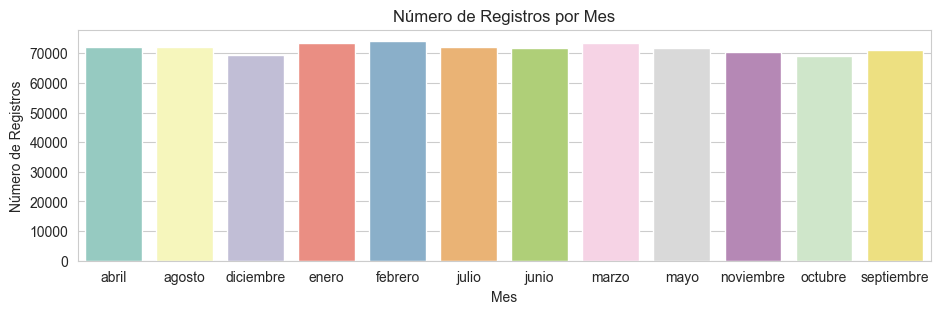

In [24]:
# ¿Cómo se distribuyen esos datos faltantes?

#Veamos primero la información por mes
sns.set_style('whitegrid')

plt.figure(figsize=(11, 3))
sns.countplot(data=gen_23,x='MES',palette='Set3')
# Agregar etiquetas y título al gráfico
plt.xlabel('Mes')
plt.ylabel('Número de Registros')
plt.title('Número de Registros por Mes')

# Mostrar el gráfico
plt.show()

In [25]:
# ¿Qué porcentaje de datos pierdo si elimino los NA de nivel educativo? (recomendación: no supere el 1%)
100* gen_23.NIVEL_EDUC.isna().sum() / len(gen_23)

3.449457598843869

In [26]:
# Tomamos la decisión de eliminarlos
gen_23.dropna(subset=['NIVEL_EDUC'],inplace=True)

In [27]:
gen_23.isna().sum()

primary_key           0
MES                   0
CLASE                 0
FEX_C18               0
DPTO                  0
SEXO                  0
EDAD                  0
CAMPESINO             0
CULTURA               0
EST_CIVIL         88075
LEE                   0
NIVEL_EDUC            0
EDUC                  0
NIVEL_EDUC_CAT        0
dtype: int64

### *Outliers* en las variables numéricas

Los boxplot son la herramienta predilecta para la valoración de outliers

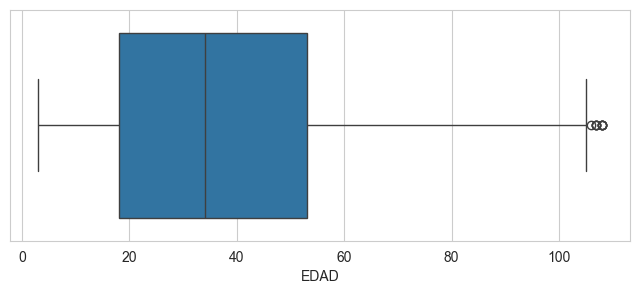

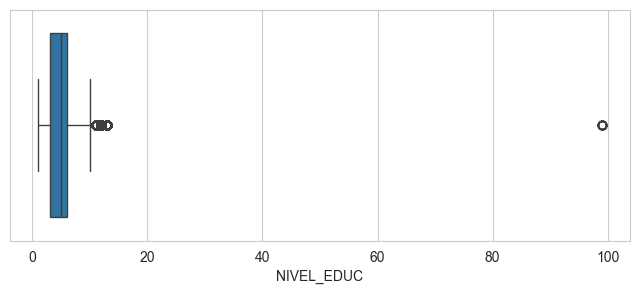

In [28]:
cols_num = ['EDAD','NIVEL_EDUC']

for i in cols_num:
    plt.subplots(ncols=1, figsize=(8,3))
    sns.boxplot(data= gen_23,x=i)


In [29]:
# Veamos que está pasando en edad

print(max(gen_23.EDAD), 'Edad máxima') # 108 años
print(len(gen_23[gen_23.EDAD >= 100]), 'Número de encuestados con mas de 100 años')


108 Edad máxima
147 Número de encuestados con mas de 100 años


In [30]:
# Veamos que está pasando en educación

print(max(gen_23.NIVEL_EDUC), 'Educación máxima') # 99 años = no informa

99.0 Educación máxima


In [31]:
gen_23[gen_23.EDUC == 99]['NIVEL_EDUC'].value_counts() # 25 personas no informan, las eliminaremos también

NIVEL_EDUC
99.0    25
Name: count, dtype: int64

In [32]:
gen_23.drop(gen_23[gen_23['NIVEL_EDUC'] == 99].index,inplace=True)

# Exploración de variables cualitativas


In [33]:
freq = gen_23.SEXO.value_counts(normalize= True)
etiquetas = freq.index

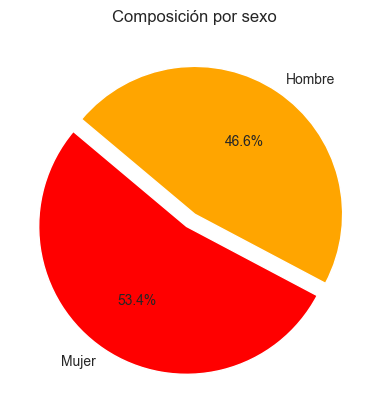

In [34]:
plt.pie(freq,labels=etiquetas,autopct='%1.1f%%', startangle=140,colors= ['red','orange'],explode = (0.1, 0) )
plt.title('Composición por sexo')
plt.show()

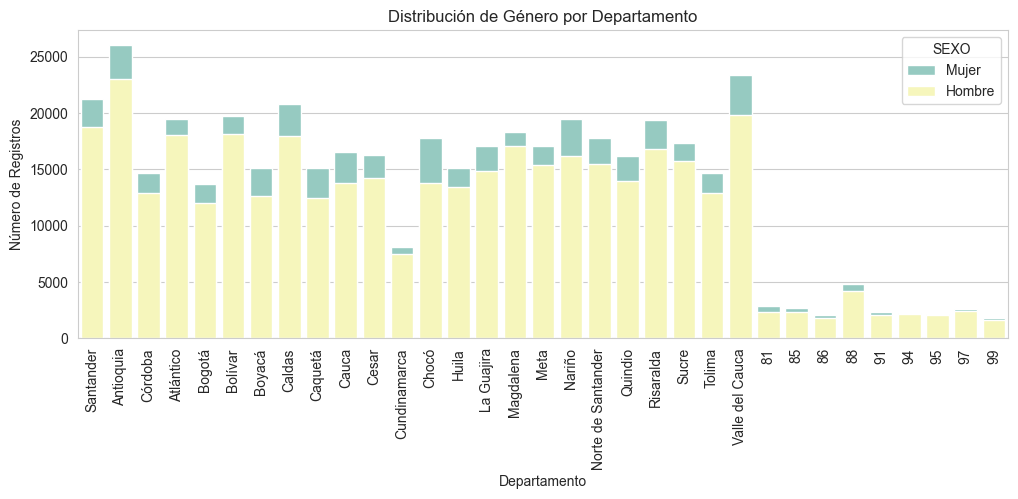

In [35]:
# Gráficos para cruzar variables cualitativas

sns.set_style("whitegrid") #Establezco estilo gráfico
#"darkgrid","whitegrid","dark","white","ticks"

plt.figure(figsize=(12, 4))
sns.countplot(x='DPTO', hue='SEXO', data=gen_23, palette='Set3',dodge=False)

# Agregar etiquetas y título al gráfico
plt.xlabel('Departamento')
plt.ylabel('Número de Registros')
plt.title('Distribución de Género por Departamento')
plt.xticks(rotation='vertical')

# Mostrar el gráfico
plt.show()

In [36]:
#¿Por qué aparecen códigos de departamentos que no deberían estar en la encuesta?¿Migrantes internos?

len(gen_23.DPTO.value_counts()) # 33 departamentos
gen_23.DPTO.value_counts().index
#gen_23.DPTO.value_counts()[24:]

Index([         'Antioquia',    'Valle del Cauca',          'Santander',
                   'Caldas',            'Bolívar',          'Atlántico',
                'Risaralda',             'Nariño',          'Magdalena',
       'Norte de Santander',              'Sucre',               'Meta',
               'La Guajira',              'Chocó',              'Cesar',
                    'Cauca',            'Quindio',              'Huila',
                   'Boyacá',            'Caquetá',            'Córdoba',
                   'Tolima',             'Bogotá',       'Cundinamarca',
                         88,                   81,                   97,
                         85,                   91,                   94,
                         95,                   86,                   99],
      dtype='object', name='DPTO')

In [37]:
departamentos_2 = {
    88: 'San Andrés',
    81: 'Arauca',
    97: 'Vaupés',
    85: 'Casanare',
    91: 'Amazonas',
    94: 'Guainía',
    95: 'Guaviare',
    86: 'Putumayo',
    99: 'Vichada'    
}

In [38]:
gen_23.DPTO.replace(departamentos_2, inplace=True)

C:\Users\Julian\AppData\Local\Temp\ipykernel_9948\214412627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gen_23.DPTO.replace(departamentos_2, inplace=True)


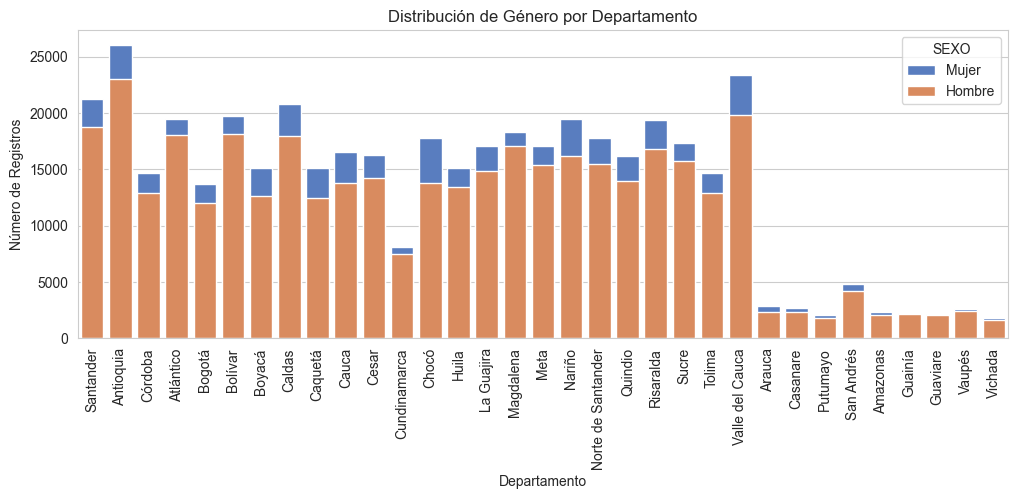

In [39]:
# Gráficos para cruzar variables cualitativas con variables dpto categorizadas

plt.figure(figsize=(12, 4))
sns.countplot(x='DPTO', hue='SEXO', data=gen_23, palette='muted',dodge=False)

# Agregar etiquetas y título al gráfico
plt.xlabel('Departamento')
plt.ylabel('Número de Registros')
plt.title('Distribución de Género por Departamento')
plt.xticks(rotation='vertical')

# Mostrar el gráfico
plt.show()

In [40]:
#Si quisiera eliminar esos registros

# Lista de valores a eliminar
#valores_a_eliminar = [88, 81, 97, 85, 94, 91, 95, 86, 99]
# Filtrar las filas que NO tienen los valores a eliminar en la columna 'DPTO'
#df_filtrado = gen_23[~gen_23['DPTO'].isin(valores_a_eliminar)]
#gen_23.columns

C:\Users\Julian\AppData\Local\Temp\ipykernel_9948\3244074445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NIVEL_EDUC_CAT', data=gen_23, palette='Set3')


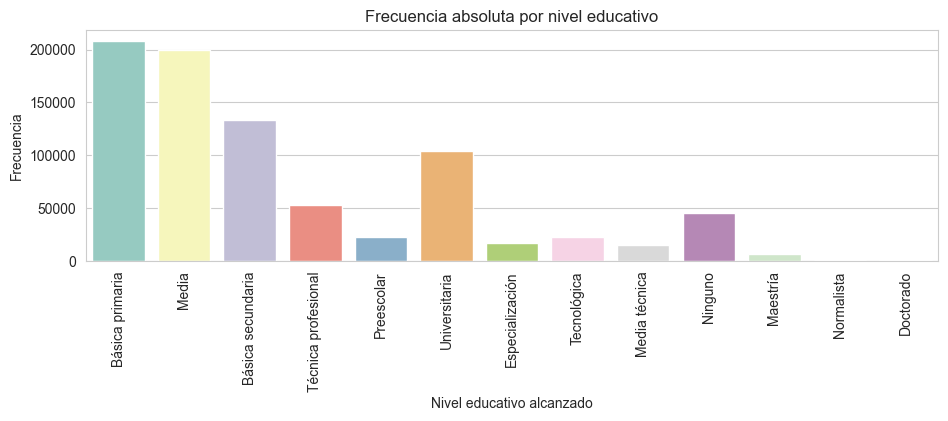

In [41]:
# Cómo se comporta el nivel de estudios en el país

#Veamos primero la información por mes
plt.figure(figsize=(11, 3))

sns.countplot(x='NIVEL_EDUC_CAT', data=gen_23, palette='Set3')
plt.title('Frecuencia absoluta por nivel educativo')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 'vertical')
plt.show()


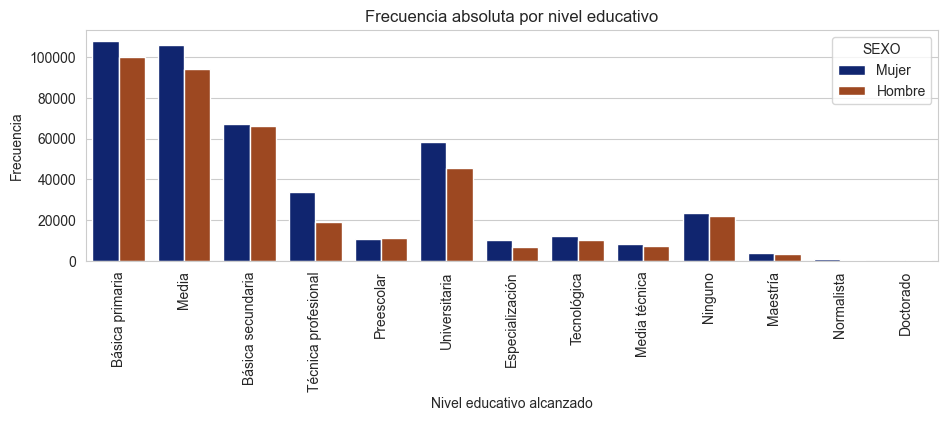

In [42]:
plt.figure(figsize=(11, 3))

sns.countplot(x='NIVEL_EDUC_CAT', data=gen_23, palette='dark',hue='SEXO')
plt.title('Frecuencia absoluta por nivel educativo')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 'vertical')
plt.show()

In [43]:
# Usando operadores lógicos para el análisis 

len(gen_23[(gen_23['SEXO'] == 'Hombre') & (gen_23['NIVEL_EDUC_CAT'] == 'Universitaria')])

45739

In [44]:
pd.crosstab(gen_23.NIVEL_EDUC_CAT,gen_23.SEXO,normalize='index',margins=True,margins_name='Total')* 100

SEXO,Hombre,Mujer
NIVEL_EDUC_CAT,,
Básica primaria,48.155468,51.844532
Básica secundaria,49.645932,50.354068
Doctorado,58.714597,41.285403
Especialización,41.159016,58.840984
Maestría,46.851774,53.148226
Media,46.989205,53.010795
Media técnica,46.769590,53.230410
Ninguno,48.383357,51.616643
Normalista,22.152341,77.847659


In [45]:
pd.crosstab(gen_23.NIVEL_EDUC_CAT,gen_23.SEXO,normalize='columns',margins=True,margins_name='Total')* 100

SEXO,Hombre,Mujer,Total
NIVEL_EDUC_CAT,,,
Básica primaria,25.839453,24.310388,25.023463
Básica secundaria,17.094026,15.151180,16.057222
Doctorado,0.139070,0.085455,0.110458
Especialización,1.825200,2.280219,2.068022
Maestría,0.862029,0.854547,0.858036
Media,24.247499,23.904760,24.064595
Media técnica,1.860290,1.850240,1.854927
Ninguno,5.706523,5.320060,5.500286
Normalista,0.081791,0.251178,0.172185


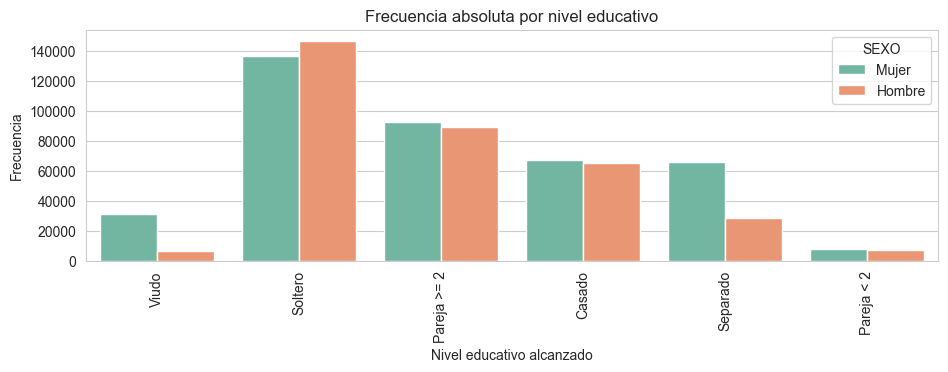

In [46]:
# Por estado civil

plt.figure(figsize=(11, 3))

sns.countplot(x='EST_CIVIL', data=gen_23, palette='Set2',hue='SEXO')
plt.title('Frecuencia absoluta por nivel educativo')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 'vertical')
plt.show()

# Exploración variables cuantitativas

In [47]:
gen_23.describe().round(2)

,CLASE,FEX_C18,EDAD,CAMPESINO,CULTURA,LEE,NIVEL_EDUC,EDUC
count,831084.00,831084.00,831084.00,831084.00,831084.00,831084.00,831084.00,831084.00
mean,1.13,709.97,36.16,1.72,5.70,1.09,5.18,3.15
std,0.33,1017.34,21.42,0.60,1.02,0.28,2.77,2.62
min,1.00,7.82,3.00,1.00,1.00,1.00,1.00,0.00
25%,1.00,149.59,18.00,1.00,6.00,1.00,3.00,2.00
50%,1.00,301.16,34.00,2.00,6.00,1.00,5.00,2.00
75%,1.00,846.14,53.00,2.00,6.00,1.00,6.00,4.00
max,2.00,14859.25,108.00,9.00,6.00,2.00,13.00,20.00


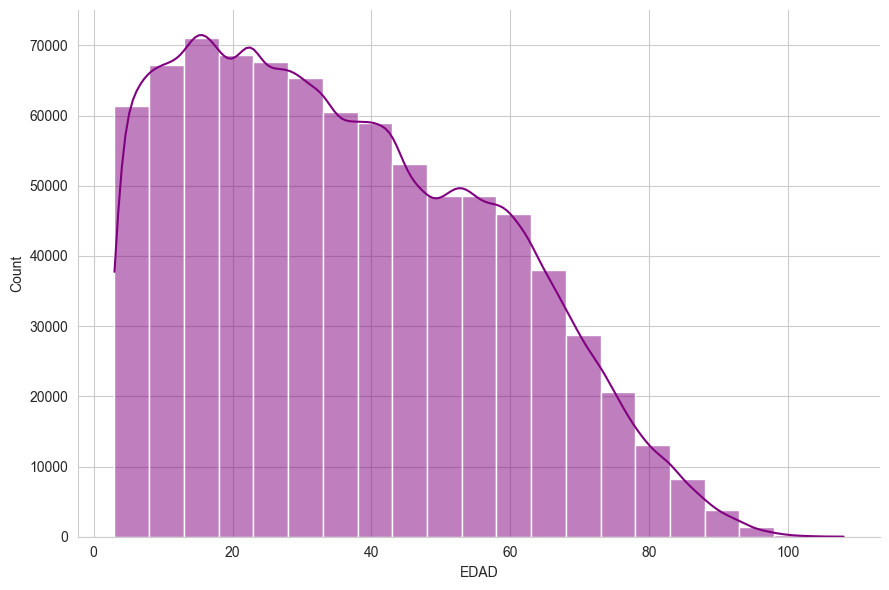

In [48]:
sns.displot(data=gen_23,x = 'EDAD',kde= True, color = 'purple', bins = 'sturges', height=6, aspect=1.5)
plt.show()

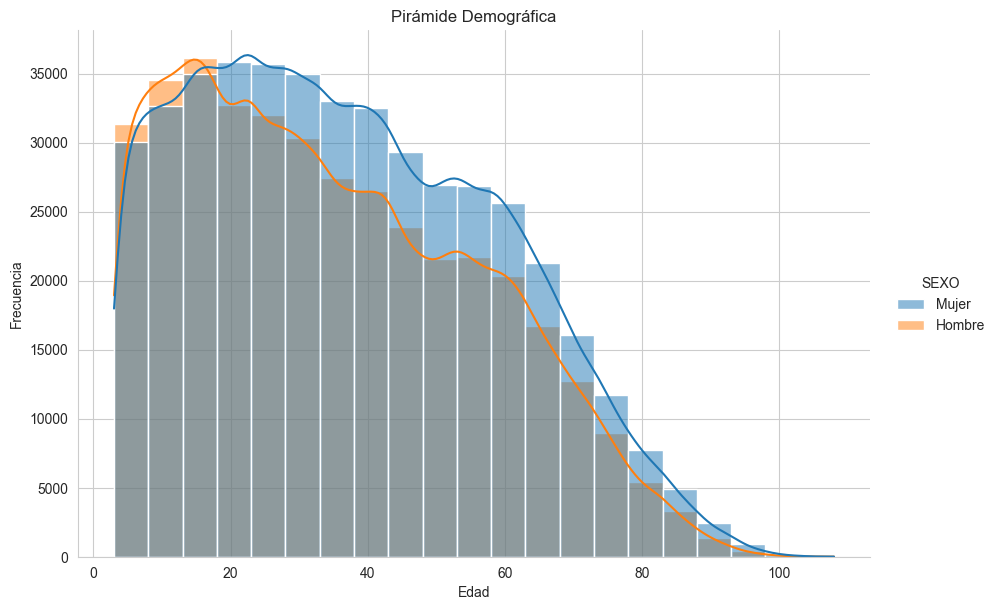

In [49]:
# Veamoslo segmentado por sexo

sns.displot(data=gen_23, x='EDAD', kde=True, color='purple', bins='sturges', hue='SEXO', height=6, aspect=1.5)

plt.title('Pirámide Demográfica')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()


In [50]:
gen_23.NIVEL_EDUC.value_counts()

NIVEL_EDUC
3.0     207966
5.0     199997
4.0     133449
10.0    104347
8.0      52812
1.0      45712
9.0      22377
2.0      22341
11.0     17187
6.0      15416
12.0      7131
7.0       1431
13.0       918
Name: count, dtype: int64

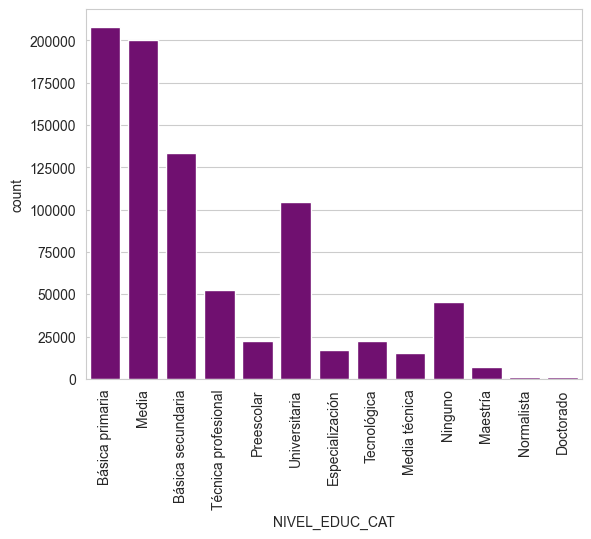

In [51]:
sns.countplot(data=gen_23,x = 'NIVEL_EDUC_CAT',color = 'purple')
plt.xticks(rotation = 'vertical')
plt.show()

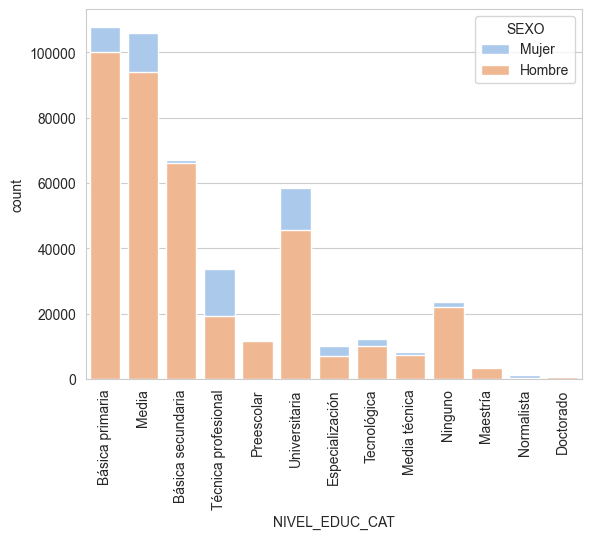

In [52]:
sns.countplot(data=gen_23,x='NIVEL_EDUC_CAT',color = 'purple',palette= 'pastel',hue='SEXO', dodge=False)
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
pd.crosstab(gen_23.EDUC,gen_23.NIVEL_EDUC)

NIVEL_EDUC,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
EDUC,,,,,,,,,,,,,
0.0,45712,20009,11780,12206,5733,436,14,966,364,2001,175,81,17
1.0,0,2332,20239,30643,19952,1339,70,2548,812,4344,902,288,42
2.0,0,0,33207,32567,174312,13641,62,4073,881,4269,11810,306,52
3.0,0,0,37217,32063,0,0,34,3458,768,4061,541,424,37
4.0,0,0,29363,25970,0,0,667,40055,2149,4153,3130,5350,39
5.0,0,0,76160,0,0,0,584,898,1010,3645,223,145,46
6.0,0,0,0,0,0,0,0,801,16376,3871,308,484,447
7.0,0,0,0,0,0,0,0,5,6,3582,5,12,15
8.0,0,0,0,0,0,0,0,5,2,4168,93,41,122


# Conjunto de datos ocupados

In [54]:
ocu_23 = pd.read_csv('Data sets/ocu_23.csv')
ocu_23.sample(3)

,Unnamed: 0,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,MES,CLASE,FEX_C18,DPTO,P6440,...,P6426,P6430,P3045S1,P6500,P6800,P3069,RAMA2D_R4,INGLABO,RAMA4D_R4,OFICIO_C8
311618,311619,7573141,1,4,1,10,1,3591.728212,23,1,...,12,1,2.0,1000000.0,36,2,46,1096000.0,4632,8323
285188,285189,7605844,1,3,1,11,1,108.217257,19,1,...,12,1,1.0,1160000.0,48,10,86,1160000.0,8610,5321
207953,207954,7476537,1,2,1,6,1,182.282919,19,1,...,276,1,1.0,1160000.0,48,10,86,1160000.0,8610,5321


In [55]:
ocu_23.drop('Unnamed: 0', axis=1, inplace=True)
ocu_23.sample(3)

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,MES,CLASE,FEX_C18,DPTO,P6440,P6450,...,P6426,P6430,P3045S1,P6500,P6800,P3069,RAMA2D_R4,INGLABO,RAMA4D_R4,OFICIO_C8
277039,7597593,1,5,1,11,1,255.778131,17,1,2.0,...,108,1,1.0,NaN,60,9,86,NaN,8610,2221
293617,7613648,1,2,1,11,1,321.637664,23,1,2.0,...,120,1,1.0,3000000.0,48,6,47,3000000.0,4754,2411
318867,7580069,1,1,1,10,1,3067.852025,23,1,2.0,...,168,2,1.0,4000000.0,30,10,85,4000000.0,8530,2330


In [56]:
# Creamos una primary key

ocu_23['primary_key'] = ocu_23['DIRECTORIO'].astype(str) + '-' + ocu_23['SECUENCIA_P'].astype(str) + '-' + ocu_23['ORDEN'].astype(str) + '-' + ocu_23['HOGAR'].astype(str)

In [57]:
ocu_23 = ocu_23[['primary_key','MES', 'CLASE','FEX_C18', 'DPTO', 'P6440', 'P6450', 'P6460', 'P6400', 'P6426', 'P6430','P3045S1', 'P6500', 'P6800', 'P3069', 'RAMA2D_R4', 'INGLABO','RAMA4D_R4', 'OFICIO_C8']]
ocu_23.sample(3)

,primary_key,MES,CLASE,FEX_C18,DPTO,P6440,P6450,P6460,P6400,P6426,P6430,P3045S1,P6500,P6800,P3069,RAMA2D_R4,INGLABO,RAMA4D_R4,OFICIO_C8
244992,7425395-1-3-1,5,1,87.347501,15,1,2.0,1.0,1.0,2,1,1.0,1160000.0,50,5,56,1160000.0,5611,9412
288986,7609659-1-4-1,11,1,261.476545,68,1,1.0,NaN,1.0,18,7,2.0,600000.0,60,3,1,700000.0,123,9211
281815,7602299-1-1-1,11,2,572.216363,54,1,1.0,NaN,1.0,15,7,2.0,700000.0,70,2,1,950000.0,145,6122


In [58]:
ocu_23.shape

(365819, 19)

In [59]:
df_models = pd.merge(gen_23, ocu_23, on='primary_key', how='inner')
df_models.shape

(365814, 32)

In [70]:
df_models.columns

Index(['primary_key', 'MES_x', 'CLASE_x', 'FEX_C18_x', 'DPTO_x', 'SEXO',
       'EDAD', 'CAMPESINO', 'CULTURA', 'EST_CIVIL', 'LEE', 'NIVEL_EDUC',
       'EDUC', 'NIVEL_EDUC_CAT', 'MES_y', 'CLASE_y', 'FEX_C18_y', 'DPTO_y',
       'P6440', 'P6450', 'P6460', 'P6400', 'P6426', 'P6430', 'P3045S1',
       'P6500', 'P6800', 'P3069', 'RAMA2D_R4', 'INGLABO', 'RAMA4D_R4',
       'OFICIO_C8'],
      dtype='object')

In [72]:
SimpleModel = df_models[['NIVEL_EDUC','INGLABO']]
SimpleModel.isna().sum()

NIVEL_EDUC        0
INGLABO       13928
dtype: int64

In [75]:
SimpleModel.dropna(inplace=True)
SimpleModel.isna().sum()

C:\Users\Julian\AppData\Local\Temp\ipykernel_9948\144629252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SimpleModel.dropna(inplace=True)


NIVEL_EDUC    0
INGLABO       0
dtype: int64

## Covarianza

La covarianza es una medida estadística que describe la relación y la magnitud de la variabilidad conjunta entre dos variables aleatorias. Indica cómo dos variables se mueven juntas y en qué dirección lo hacen: si tienden a aumentar o disminuir en conjunto.

Es importante mencionar que la covarianza puede ser positiva, negativa o cero:

- **Covarianza positiva:** Indica que cuando una variable tiende a tener valores por encima de su media, la otra variable también tiende a tener valores por encima de su media, y viceversa.

- **Covarianza negativa:** Indica que cuando una variable tiende a tener valores por encima de su media, la otra variable tiende a tener valores por debajo de su media, y viceversa.

- **Covarianza igual a cero:** Indica que no hay relación lineal entre las variables.

$$Cov(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$$

In [76]:
df_models.NIVEL_EDUC.cov(df_models.INGLABO)

2345148.9724865616

## Coeficiente de correlación de pearson

El coeficiente de correlación de Pearson es una medida estadística que evalúa la relación lineal entre dos variables continuas. Es una medida de la fuerza y la dirección de la relación lineal entre dos conjuntos de datos.

Este coeficiente varía entre -1 y 1. Un valor de 1 indica una correlación lineal positiva perfecta, lo que significa que cuando una variable aumenta, la otra también lo hace en proporción constante. Un valor de -1 indica una correlación lineal negativa perfecta, lo que significa que cuando una variable aumenta, la otra disminuye en proporción constante. Un valor de 0 indica que no hay relación lineal entre las dos variables.

$$\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}$$

In [77]:
import scipy

df_models.NIVEL_EDUC.corr(df_models.INGLABO) # Cercano a 1, a 0 o a -1
df_models.NIVEL_EDUC.corr(df_models.INGLABO, method= 'spearman')
df_models.NIVEL_EDUC.corr(df_models.INGLABO, method= 'kendall')

0.4071012268546981

In [78]:
# Coeficiente de determinación r^2

r = df_models.NIVEL_EDUC.corr(df_models.INGLABO)
r**2

0.14805100239264235

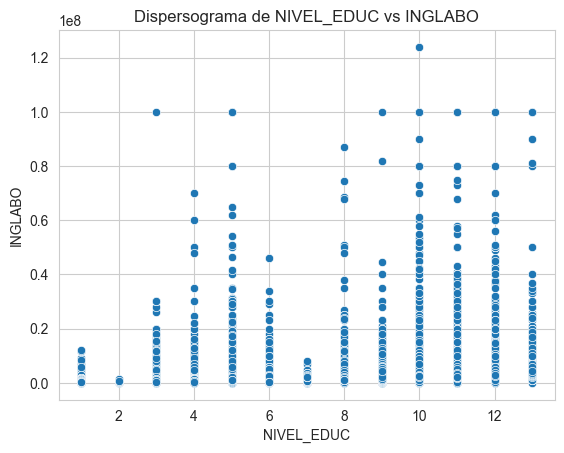

In [91]:
# Suponiendo que tienes dos columnas 'NIVEL_EDUC' e 'INGLABO' en tu DataFrame df_models
x = SimpleModel['NIVEL_EDUC']
y = SimpleModel['INGLABO']

# Crear el dispersograma utilizando Seaborn
sns.scatterplot(x=x, y=y)
plt.xlabel('NIVEL_EDUC')
plt.ylabel('INGLABO')
plt.title('Dispersograma de NIVEL_EDUC vs INGLABO')
plt.show()


## Modelos de regresión lineal

In [66]:
# Librería para la regresión lineal
import statsmodels.api as sm

In [127]:
sample_model = df_models[['primary_key','FEX_C18_x', 'DPTO_x','SEXO','EDAD','NIVEL_EDUC','EST_CIVIL','P6440','P6400','P6426','P6800','P3069','RAMA2D_R4', 'INGLABO', 'RAMA4D_R4','OFICIO_C8']]

# contrato_laboral, outsourcing,tiempo_empresa,horas_semanales,tamaño_empresa

In [129]:
sample_model.columns = ['primary_key', 'FEX_C18_x', 'DPTO_x', 'SEXO', 'EDAD', 'NIVEL_EDUC',
       'EST_CIVIL', 'CONTRATO_LAB', 'OUTSORCING', 'TIEMPO_EMPRESA', 'HORAS_SEMANA', 'TAMAÑO_EMPRESA', 'RAMA2D_R4',
       'INGLABO', 'RAMA4D_R4', 'OFICIO_C8']

In [161]:
sample_model = sample_model.dropna(subset=['INGLABO'])
sample_model = sample_model[sample_model['INGLABO'] != 0]
sample_model.isna().sum()

primary_key            0
FEX_C18_x              0
DPTO_x                 0
SEXO                   0
EDAD                   0
NIVEL_EDUC             0
EST_CIVIL              0
CONTRATO_LAB           0
OUTSORCING        138887
TIEMPO_EMPRESA         0
HORAS_SEMANA           0
TAMAÑO_EMPRESA         0
RAMA2D_R4              0
INGLABO                0
RAMA4D_R4              0
OFICIO_C8              0
dtype: int64

In [167]:
sample_model.SEXO = sample_model.SEXO.replace({'Mujer': 1, 'Hombre': 0}) 
sample_model.CONTRATO_LAB = sample_model.CONTRATO_LAB.replace({2 : 0})
sample_model = sample_model[sample_model['INGLABO'] != 0]

In [168]:
sample_model.sample(3)

,primary_key,FEX_C18_x,DPTO_x,SEXO,EDAD,NIVEL_EDUC,EST_CIVIL,CONTRATO_LAB,OUTSORCING,TIEMPO_EMPRESA,HORAS_SEMANA,TAMAÑO_EMPRESA,RAMA2D_R4,INGLABO,RAMA4D_R4,OFICIO_C8
6970,7402657-1-1-1,234.115361,Santander,0,21,10.0,Soltero,1,1.0,2,20,6,41,1160000.0,4111,4110
365602,7567133-1-1-1,107.396349,La Guajira,1,54,3.0,Pareja >= 2,1,1.0,84,40,3,97,870000.0,9700,9111
297391,7617670-1-1-1,315.918426,Santander,0,51,13.0,Casado,1,2.0,72,47,10,85,9000000.0,8530,1345


In [170]:
# Modelo 1: modelo lineal simple

x = sample_model['NIVEL_EDUC']
y = sample_model['INGLABO']

x = sm.add_constant(x)

modelo1 = sm.OLS(y,x)
r_m1 = modelo1.fit()

print(r_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                INGLABO   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                 6.078e+04
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:24:08   Log-Likelihood:            -5.5496e+06
No. Observations:              348363   AIC:                         1.110e+07
Df Residuals:                  348361   BIC:                         1.110e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.037e+05   8051.878    -37.715      0.0

In [172]:
# Modelo 2, gestionando el problema de la linealidad

sample_model['LOG_INGLABO'] = np.log(sample_model['INGLABO'])

y = sample_model['LOG_INGLABO'] 
x = sample_model['NIVEL_EDUC'] 
x = sm.add_constant(x)

modelo2 = sm.OLS(y,x)
r_m2 = modelo2.fit()
print(r_m2.summary())


                            OLS Regression Results                            
Dep. Variable:            LOG_INGLABO   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                 1.197e+05
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:            -4.1460e+05
No. Observations:              348363   AIC:                         8.292e+05
Df Residuals:                  348361   BIC:                         8.292e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8109      0.003   4012.148      0.0

In [178]:
# Modelo numero 3, controlando variables

y = sample_model['LOG_INGLABO'] 
x = sample_model[['NIVEL_EDUC','SEXO', 'EDAD','CONTRATO_LAB','TIEMPO_EMPRESA','HORAS_SEMANA','TAMAÑO_EMPRESA']]
x = sm.add_constant(x)


modelo3 = sm.OLS(y,x)
r_m3 = modelo3.fit()
print(r_m3.summary())

                            OLS Regression Results                            
Dep. Variable:            LOG_INGLABO   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                 5.003e+04
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:31:20   Log-Likelihood:            -3.4483e+05
No. Observations:              348363   AIC:                         6.897e+05
Df Residuals:                  348355   BIC:                         6.898e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5660      0.006   1788.